# Orders - Multivariate Regression of review_score

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# import orders dataset
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Let's recall our simple analysis from yesterday's exercice: 

Based our the correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated together. In this exercice, we will use `statsmodels` to distinguish the effect of one feature, **holding the other one constant**.

<AxesSubplot:>

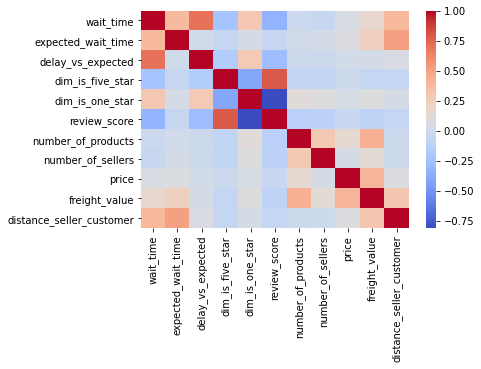

In [20]:
sns.heatmap(orders.corr(), cmap='coolwarm')

(0.0, 5.9259505071808425)

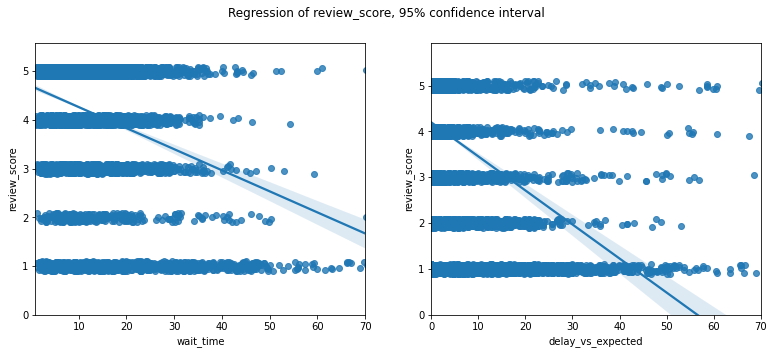

In [21]:
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = orders.delay_vs_expected, y= orders.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` in order to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, Print the `summary` table and interpret results:
- Make sure to understand how these results match those of seaborn regplot
- Read the regression performance metric R-square, as well as individual regressions coefficients, t-values, p-values, and 95% confidence intervals

In [22]:
import statsmodels.formula.api as smf

In [2]:
# YOUR CODE HERE

In [3]:
# YOUR CODE HERE

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

In [4]:
# YOUR CODE HERE

----
❓Our multivariate regression allows us to isolate the impact of one feature, while controlling for the effect of other features. These new coefficients are called **partial correlation** coefficients. Can you notice the difference with the **simple regression** coeffients computed with seaborn above? What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


In [26]:
# Your answer

<details>
    <summary>💡 Solution</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces review_score on average by 0.0191 [0.017 - 0.21] points
- Holding `delay` constant, each additional day of `wait_time` reduces review_score on average by 0.0388 points 

Contrary to what was found with simple bivariate correlation analysis, `delay` is actually less impactfull than `wait_time` in driving lower `review_score`! This interesting findings demonstrate the importance of multi-variate regression to remove potential impact of counfounding factors

---
❓ R-square is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. Let's try to add more feature to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset.
    - Do not to create **data leaks**: do not to add features that are directly derived from the `review_score`
    - Do not add two features perfectly colinear to each other
    - Transform each features $X_i$ into their respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare their partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ are not of same dimension and you can't compare apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

In [27]:
# Select features

In [29]:
# standardize features (transfor them to their respective z-score)

In [31]:
# Create and train model4

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [5]:
# Your answer

<details>
    <summary>💡Explanations</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score`. 
- Distance plays also a role.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics is much greater than 1 (at least one feature has a very low p-value)

- R-squared isn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-squared is frequent when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

Regression performance should not be measured only by it's R-squared!  
Always visualize the distribution of the predictions, and especially of your residuals.

❓ Compute the residuals, notice how their mean is equal to 0 (always the case in linear regression), and compute the associated RMSE.   
Plot the `residuals` in a histogram.

In [6]:
# Your code

❓ Can you guess why has the residual distlot such strange shape? To understand, plot in the same axe the histogram of `review_score` as well as that of the `predicted_review_score` for each rows of the dataset

In [7]:
# Your code

<details>
    <summary>💡Explanations</summary>

Our model is not so great, for two reasons
- First, because we don't have enough feature to explain a significant proportion of the review_scores (low R-square)
- Secondly, because we are trying to fit a "linear regression" function to a descreet classification problem

Tomorrow, you will discover a new model: the logistic regression classifier
    
</details>

🏁 Great job! Don't forget to *save*, *commit* and *push* this notebook when you are done